# inspect single model


In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## timestamp and dir for saving
tstamp = time.perf_counter_ns()
import os
os.mkdir('figures/scratch_folders/%i'%tstamp)

In [3]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
humanB_acc,humanI_acc = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [4]:
(42/44)*(160)*2

305.4545454545455

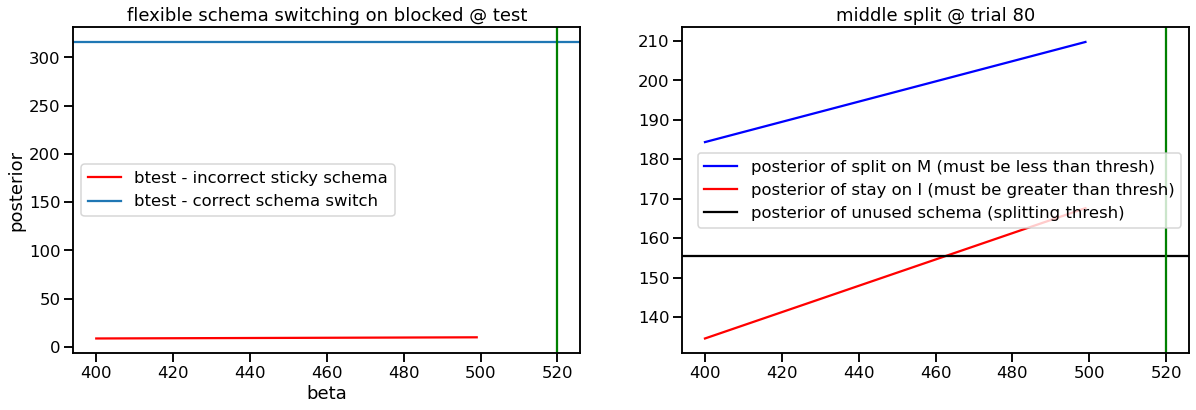

In [5]:
f,axar = plt.subplots(1,2,figsize=(20,6),sharex=True,sharey=False)

## stay interleaved early
l = 1
a = 311
S = 2
bet = 520
x = np.arange(400,500)

## blocked test
# posterior of incorrect sticky schema on first test trial of blocked
A = lambda b: (l/((S*l)+80))*(320+b)
# posterior of correct schema on first test trial of blocked
B = ((l+80)/((S*l)+80))*320

## plt
ax =axar[0]
ax.plot(x,A(x),c='r',label ='btest - incorrect sticky schema')
ax.axhline(B, label ='btest - correct schema switch')
ax.axvline(bet,c='g')
ax.legend()
ax.set_title('flexible schema switching on blocked @ test')
ax.set_xlabel('beta')
ax.set_ylabel('posterior')

## middle splits at trial 80
# stay on second trial of interleaved
stI = lambda b: (l/(S*l+1))*(4+b) 
# split on trial 80 of middle
spM = lambda b: ((l+20)/(S*l+80))*(320+b) 

## plt
ax=axar[1]
ax.set_title('middle split @ trial 80')
ax.plot(x,spM(x),c='b',label='posterior of split on M (must be less than thresh)')
ax.plot(x,stI(x),c='r',label='posterior of stay on I (must be greater than thresh)')
ax.axhline(a/2,c='k',label='posterior of unused schema (splitting thresh)')
ax.axvline(bet,c='g')
ax.legend()

plt.savefig('figures/posterior-vs-beta_middleCI-and-blockedtest')


In [6]:
## default params
taskargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
schargs = {
    'concentration':311,
    'stickiness_wi':680,
    'stickiness_bt':470, # 100
    'sparsity':1.03,
    'pvar': 0,
    'lrate':1,
    'lratep':1,
    'decay_rate':1,
} 
semargs = {
  'beta2':False
}
args = {
    'sem':semargs,
    'sch':schargs,
    'exp':taskargs
}
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str += "-"+"-".join(["%s_%.3f"%(i,j) for i,j in semargs.items()])
param_str

'concentration_311.000-stickiness_wi_680.000-stickiness_bt_470.000-sparsity_1.030-pvar_0.000-lrate_1.000-lratep_1.000-decay_rate_1.000-beta2_0.000'

### main

In [7]:
ns = 50
L = []
condL = ['blocked','interleaved',
         'early','middle','late'
        ]
exp_batch_data = run_batch_exp_curr(ns,args,condL) # [curr,seeds,{data}]


In [45]:
def get_bad_seed(exp_batch_data,max_splits=10):
  bad_seed_L = []
  for curr_idx in range(5):
    for seed_idx in range(ns):
      max_sch = np.max(exp_batch_data[curr_idx][seed_idx]['zt'])
      if max_sch>max_splits:
        bad_seed_L.append(seed_idx)
  return list(set(bad_seed_L))

In [60]:
## accuracy
bad_seeds = get_bad_seed(exp_batch_data,max_splits=6)
good_seeds = np.setdiff1d(np.arange(ns),bad_seeds)
batch_acc = unpack_acc(exp_batch_data)[:,good_seeds] # curr,seeds,trials
print(batch_acc.shape)
mean_acc = batch_acc.mean(1)
test_acc = mean_acc[:,-40:].mean(1) # curr  
test_acc

(5, 27, 200)


array([1.        , 0.48573146, 0.86245308, 0.62573071, 0.51583802])

In [90]:
s=19
batch_acc[3,s].round(3)

array([0.5  , 0.25 , 0.75 , 0.5  , 0.75 , 0.25 , 0.002, 0.75 , 0.418,
       1.   , 0.5  , 0.   , 0.5  , 0.082, 0.   , 0.082, 0.252, 0.5  ,
       0.502, 0.5  , 0.502, 0.5  , 1.   , 0.5  , 0.   , 0.5  , 0.   ,
       0.998, 0.5  , 0.001, 0.   , 0.998, 0.499, 0.   , 0.499, 0.   ,
       0.5  , 0.001, 0.502, 0.5  , 0.502, 0.   , 0.499, 0.5  , 0.918,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.001, 0.487, 0.   , 0.   , 0.082, 0.5  , 0.5  ,
       0.5  , 0.5  , 0.5  , 0.   , 0.5  , 0.   , 0.5  , 0.   , 0.5  ,
       0.   , 0.47 ,

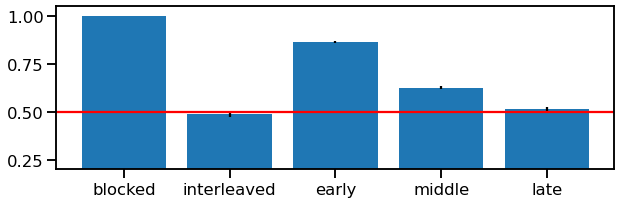

In [61]:
plt.figure(figsize=(10,3))
M = mean_acc[:,-40:].mean(1)
S = mean_acc[:,-40:].std(1)/np.sqrt(ns)
plt.bar(condL,test_acc,yerr=S)
plt.ylim(0.2,1.05)
plt.axhline(0.5,c='r')
plt.savefig('figures/single_model_nb/testacc%s.png'%param_str)

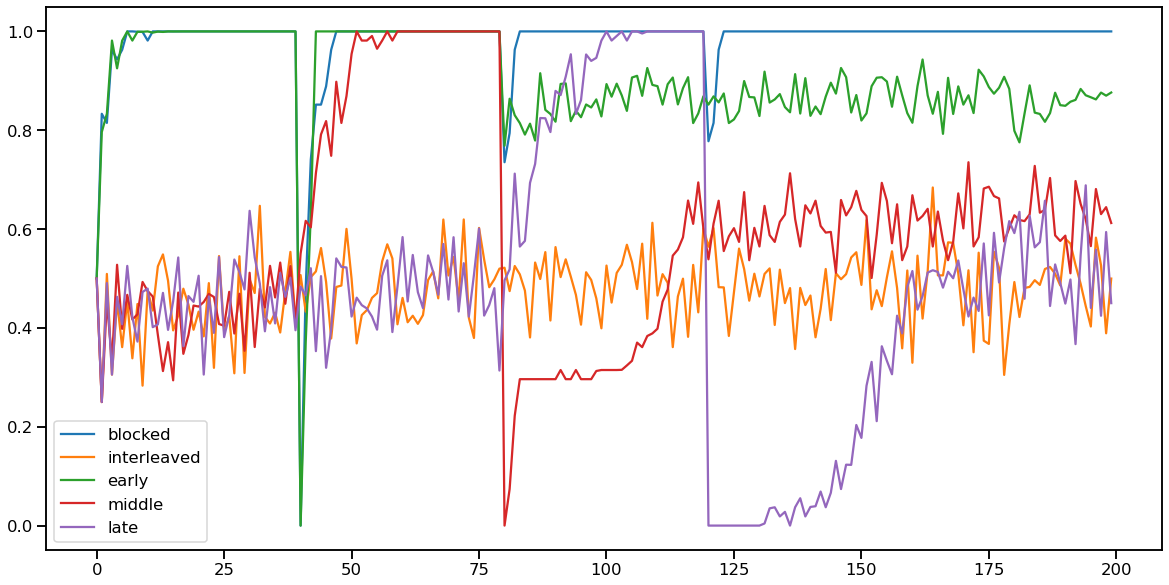

In [62]:
plt.figure(figsize=(20,10))
for idx in range(len(condL)):
  plt.plot(mean_acc[idx],label=condL[idx])
plt.legend()
plt.savefig('figures/single_model_nb/acc-by-time-%s.png'%param_str)

# analysis of model state

<BarContainer object of 5 artists>

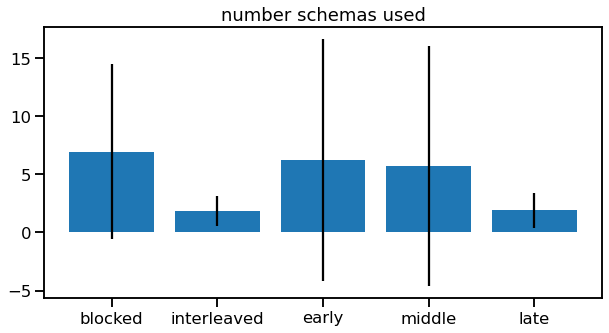

In [63]:
## count number of schemas used
def count_num_schemas(exp_data):
  """ 
  """
  L = []
  for curr_idx in range(5):
    num_schemas_used = [
      len(np.unique(exp_data[curr_idx][i]['zt'][:,:-1].flatten())
         ) for i in range(ns)
    ]
    L.append(num_schemas_used)
  nschemas = np.array(L)
  return nschemas


nschemas = count_num_schemas(exp_batch_data)
M = nschemas.mean(1)
S = nschemas.std(1)
plt.figure(figsize=(10,5))
plt.title('number schemas used')
plt.bar(condL,M,yerr=S)

In [ ]:
priors = unpack_data(exp_batch_data,
        dtype='priors')[curr_idx][seed_idx]
likes = unpack_data(exp_batch_data,
        dtype='likes')[curr_idx][seed_idx]
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][seed_idx]


In [ ]:
tstep = 1
sch = 1
post[:,tstep,sch]
